# Serie temporali

**Tutorial**: https://www.tensorflow.org/tutorials/structured_data/time_series

Questo set di dati contiene 14 diverse funzionalità come la temperatura dell'aria, la pressione atmosferica e l'umidità. Questi sono stati raccolti ogni 10 minuti, a partire dal 2003.

In [ ]:
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler

zip_path = tf.keras.utils.get_file(origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip', fname='jena_climate_2009_2016.csv.zip', extract=True)
csv_path, _ = os.path.splitext(zip_path)
df = pd.read_csv(csv_path)
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

# Ispezione

In [ ]:
df.head(10)

p (mbar)  T (degC)  Tpot (K)  ...  wv (m/s)  max. wv (m/s)  wd (deg)
0    996.52     -8.02    265.40  ...      1.03           1.75     152.3
1    996.57     -8.41    265.01  ...      0.72           1.50     136.1
2    996.53     -8.51    264.91  ...      0.19           0.63     171.6
3    996.51     -8.31    265.12  ...      0.34           0.50     198.0
4    996.51     -8.27    265.15  ...      0.32           0.63     214.3
5    996.50     -8.05    265.38  ...      0.21           0.63     192.7
6    996.50     -7.62    265.81  ...      0.18           0.63     166.5
7    996.50     -7.62    265.81  ...      0.19           0.50     118.6
8    996.50     -7.91    265.52  ...      0.28           0.75     188.5
9    996.53     -8.43    264.99  ...      0.59           0.88     185.0

[10 rows x 14 columns]

In [ ]:
date_time.head(10)

0   2009-01-01 00:10:00
1   2009-01-01 00:20:00
2   2009-01-01 00:30:00
3   2009-01-01 00:40:00
4   2009-01-01 00:50:00
5   2009-01-01 01:00:00
6   2009-01-01 01:10:00
7   2009-01-01 01:20:00
8   2009-01-01 01:30:00
9   2009-01-01 01:40:00
Name: Date Time, dtype: datetime64[ns]

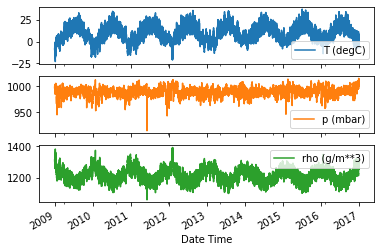

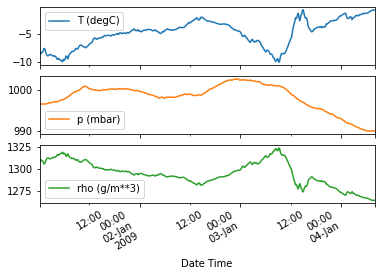

In [ ]:
# plot di 3 features: T, p e rho
plot_features = df[['T (degC)', 'p (mbar)', 'rho (g/m**3)']]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

# prime 480
plot_features = df[['T (degC)', 'p (mbar)', 'rho (g/m**3)']][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [ ]:
df.describe().transpose()

count         mean        std  ...      50%      75%      max
p (mbar)         420551.0   989.212776   8.358481  ...   989.58   994.72  1015.35
T (degC)         420551.0     9.450147   8.423365  ...     9.42    15.47    37.28
Tpot (K)         420551.0   283.492743   8.504471  ...   283.47   289.53   311.34
Tdew (degC)      420551.0     4.955854   6.730674  ...     5.22    10.07    23.11
rh (%)           420551.0    76.008259  16.476175  ...    79.30    89.40   100.00
VPmax (mbar)     420551.0    13.576251   7.739020  ...    11.82    17.60    63.77
VPact (mbar)     420551.0     9.533756   4.184164  ...     8.86    12.35    28.32
VPdef (mbar)     420551.0     4.042412   4.896851  ...     2.19     5.30    46.01
sh (g/kg)        420551.0     6.022408   2.656139  ...     5.59     7.80    18.13
H2OC (mmol/mol)  420551.0     9.640223   4.235395  ...     8.96    12.49    28.82
rho (g/m**3)     420551.0  1216.062748  39.975208  ...  1213.79  1242.77  1393.54
wv (m/s)         420551.0     1.702224  65.446714  ...     1.76     2.86    28.49
max. wv (m/s)    420551.0     3.056555  69.016932  ...     2.96     4.74    23.50
wd (deg)         420551.0   174.743738  86.681693  ...   198.10   234.10   360.00

[14 rows x 8 columns]

# Pulizia


Una cosa che dovrebbe risaltare è il valore min della velocità del vento, wv (m/s) e max. wv (m/s) colonne max. wv (m/s) . Questo -9999 è probabilmente errato. C'è una colonna di direzione del vento separata, quindi la velocità dovrebbe essere >=0. Sostituiscilo con zeri.



In [ ]:
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

df.describe().transpose()

count         mean        std  ...      50%      75%      max
p (mbar)         420551.0   989.212776   8.358481  ...   989.58   994.72  1015.35
T (degC)         420551.0     9.450147   8.423365  ...     9.42    15.47    37.28
Tpot (K)         420551.0   283.492743   8.504471  ...   283.47   289.53   311.34
Tdew (degC)      420551.0     4.955854   6.730674  ...     5.22    10.07    23.11
rh (%)           420551.0    76.008259  16.476175  ...    79.30    89.40   100.00
VPmax (mbar)     420551.0    13.576251   7.739020  ...    11.82    17.60    63.77
VPact (mbar)     420551.0     9.533756   4.184164  ...     8.86    12.35    28.32
VPdef (mbar)     420551.0     4.042412   4.896851  ...     2.19     5.30    46.01
sh (g/kg)        420551.0     6.022408   2.656139  ...     5.59     7.80    18.13
H2OC (mmol/mol)  420551.0     9.640223   4.235395  ...     8.96    12.49    28.82
rho (g/m**3)     420551.0  1216.062748  39.975208  ...  1213.79  1242.77  1393.54
wv (m/s)         420551.0     2.130191   1.542334  ...     1.76     2.86    28.49
max. wv (m/s)    420551.0     3.532074   2.340482  ...     2.96     4.74    23.50
wd (deg)         420551.0   174.743738  86.681693  ...   198.10   234.10   360.00

[14 rows x 8 columns]

# Data engineering

1.   Vento: L'ultima colonna dei dati, wd (deg) , indica la direzione del vento in unità di gradi. Gli angoli non creano buoni input del modello, 360 ° e 0 ° dovrebbero essere vicini l'uno all'altro e avvolgere uniformemente. La direzione non dovrebbe importare se il vento non soffia. Sarà più facile da interpretare per il modello se si convertono le colonne di direzione e velocità del vento in un vettore VENTO.
2.   Simile alla direzione del vento, il tempo in secondi non è un utile input da modello. Essendo dati meteorologici, ha una chiara periodicità giornaliera e annuale. Esistono molti modi per gestire la periodicità. Un semplice approccio per convertirlo in un segnale utilizzabile consiste nell'utilizzare sin e cos per convertire il tempo per cancellare i segnali "Ora del giorno" e "Ora dell'anno".



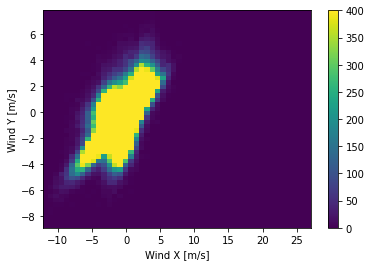

In [ ]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Converto in radianti
wd_rad = df.pop('wd (deg)') * np.pi / 180

# Calcolo le componenti x e y di wind
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calcolo le componenti x e y di max wind
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')
plt.show()

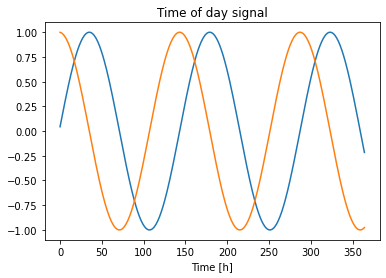

In [ ]:
timestamp_s = date_time.map(datetime.datetime.timestamp)

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

plt.plot(np.array(df['Day sin'])[:365])
plt.plot(np.array(df['Day cos'])[:365])
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.show()

# Divido i dati

Useremo una divisione (80%, 15%, 5%) per l'allenamento, la validazione e i set di test. Si noti che i dati non vengono mescolati casualmente prima della divisione. Questo per due motivi.

1.   Assicura che sia ancora possibile tagliare i dati in finestre di campioni consecutivi.
2.   Assicura che i risultati della validazione / test siano più realistici, essendo valutati sui dati raccolti dopo l'addestramento del modello.



In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.8)]
val_df = df[int(n*0.8):int(n*0.95)]
test_df = df[int(n*0.95):]

num_features = df.shape[1]
num_features, train_df.shape, val_df.shape, test_df.shape

(19, (336440, 19), (63083, 19), (21028, 19))

# Normalizzare

È importante ridimensionare le funzionalità prima di addestrare una rete neurale. La normalizzazione è un modo comune di eseguire questo ridimensionamento. La normalizzazione deve essere calcolata solo utilizzando i dati di addestramento in modo che i modelli non abbiano accesso ai valori nei set di validazione e test.

In [ ]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns)
val_df = pd.DataFrame(scaler.transform(val_df), columns = val_df.columns)
test_df = pd.DataFrame(scaler.transform(test_df), columns = test_df.columns)
train_df.head(10)

p (mbar)  T (degC)  Tpot (K)  ...   Day cos  Year sin  Year cos
0  0.826390  0.254629  0.248031  ...  0.999524  0.504726  0.999978
1  0.826889  0.248004  0.241495  ...  0.998097  0.504786  0.999977
2  0.826490  0.246305  0.239819  ...  0.995722  0.504845  0.999977
3  0.826291  0.249703  0.243338  ...  0.992404  0.504905  0.999976
4  0.826291  0.250382  0.243841  ...  0.988148  0.504965  0.999975
5  0.826191  0.254119  0.247696  ...  0.982963  0.505025  0.999975
6  0.826191  0.261423  0.254902  ...  0.976858  0.505084  0.999974
7  0.826191  0.261423  0.254902  ...  0.969846  0.505144  0.999974
8  0.826191  0.256497  0.250042  ...  0.961940  0.505204  0.999973
9  0.826490  0.247664  0.241160  ...  0.953154  0.505263  0.999972

[10 rows x 19 columns]

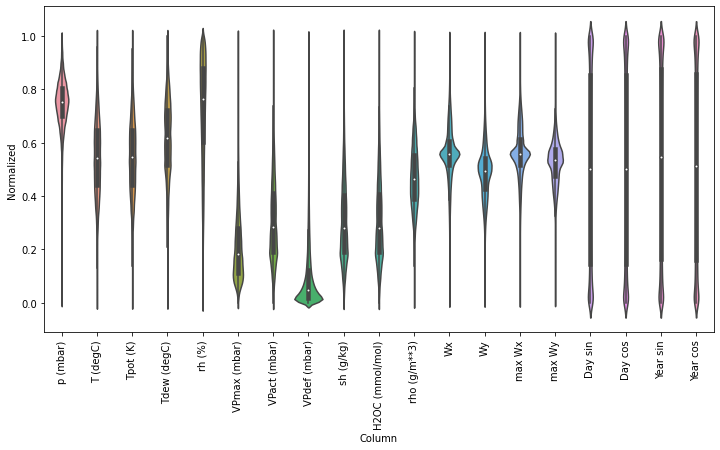

In [ ]:
df_std = train_df.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

# Classe per generare la finestra

I modelli faranno una serie di previsioni basate su una finestra di campioni consecutivi dai dati.

Le caratteristiche principali delle finestre di input sono:

1.   La larghezza (numero di fasce orarie) delle finestre di input ed etichetta.
2.   Il tempo compensato tra di loro.
3.   Quali funzioni vengono utilizzate come input, etichette o entrambi.

Questa sezione si concentra sull'implementazione della finestra dei dati in modo che possa essere riutilizzata per tutti quei modelli.

A seconda dell'attività e del tipo di modello, potresti voler generare una varietà di finestre di dati. Ecco alcuni esempi:

1. Ad esempio, per fare una singola previsione 24h nel futuro, date le 24h della storia potresti definire una finestra come questa:
![testo alternativo](https://www.tensorflow.org/tutorials/structured_data/images/raw_window_24h.png)
2. Un modello che prevede una previsione 1h nel futuro, dati 6h di storia, avrebbe bisogno di una finestra come questa:
![testo alternativo](https://www.tensorflow.org/tutorials/structured_data/images/raw_window_1h.png)

In [9]:
class WindowGenerator():
  # come input i dataset devo essere dei dataframe pandas
  def __init__(self, input_width, label_width, shift, train_df, val_df, test_df=None, batch=32, label_columns=None):
    # memorizzo gli input
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df
    self.batch = batch
    self.label_columns = label_columns
    # trasformazioni per lo split e lo slice
    self.total_window_size = input_width + shift
    self.column_indices = {name: i for i, name in enumerate(train_df.columns)}
    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]
    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in enumerate(label_columns)}

  def __repr__(self):
    return '\n'.join([f'Total window size: {self.total_window_size}', 
                      f'Input indices: {self.input_indices}', 
                      f'Label indices: {self.label_indices}', 
                      f'Label column name(s): {self.label_columns}'])
    
  def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
      labels = tf.stack([labels[:, :, self.column_indices[name]] for name in self.label_columns], axis=-1)
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    return inputs, labels

  def make_dataset(self, data):
    data = np.array(data, dtype=np.float32)
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(data=data,
                                                              targets=None,
                                                              sequence_length=self.total_window_size,
                                                              sequence_stride=1,
                                                              shuffle=True,
                                                              batch_size=self.batch)
    return ds.map(self.split_window)

  def plot(self, plot_col, model=None, max_subplots=1):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
      plt.subplot(3, 1, n+1)
      plt.ylabel(f'{plot_col}')
      plt.plot(self.input_indices, inputs[n, :, plot_col_index], label='Inputs', marker='.', zorder=-10)
      if self.label_columns:
        label_col_index = self.label_columns_indices.get(plot_col, None)
      else:
        label_col_index = plot_col_index
      if label_col_index is None:
        continue
      plt.scatter(self.label_indices, labels[n, :, label_col_index], edgecolors='k', label='Labels', c='#2ca02c', s=64)
      if model is not None:
        predictions = model(inputs)
        plt.scatter(self.label_indices, predictions[n, :, label_col_index], marker='X', edgecolors='k', label='Predictions', c='#ff7f0e', s=64)
      if n == 0:
        plt.legend()
    plt.xlabel('Time [h]')
    
  @property
  def train(self):
    return self.make_dataset(self.train_df)
  @property
  def val(self):
    return self.make_dataset(self.val_df)
  @property
  def test(self):
    if self.test_df is not None:
      return self.make_dataset(self.test_df)
    else:
      return None
  @property
  def example(self):
    # se non viene passato un esempio x, y lo prende da un batch di validation
    result = getattr(self, '_example', None)
    if result is None:
      result = next(iter(self.val))
      self._example = result
    return result

In genere i dati in TensorFlow sono raggruppati in array in cui l'indice più esterno si trova tra gli esempi (la dimensione "batch"). Gli indici intermedi sono le dimensioni "tempo" o "spazio" (larghezza, altezza). Gli indici più interni sono le caratteristiche.

Il codice sopra ha richiesto un batch di 3 finestre di 7 timestep, con 19 funzionalità per ogni fase. Li ha divisi in un batch di 6 timestep, 19 input di funzionalità e un'etichetta 1-timestep di 1 funzione. L'etichetta ha una sola funzione perché WindowGenerator stato inizializzato con label_columns=['T (degC)'] .

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['T (degC)']
Inputs shape (batch, time, features): (32, 6, 19)
Labels shape (batch, time, features): (32, 1, 1)
(TensorSpec(shape=(None, 6, 19), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))


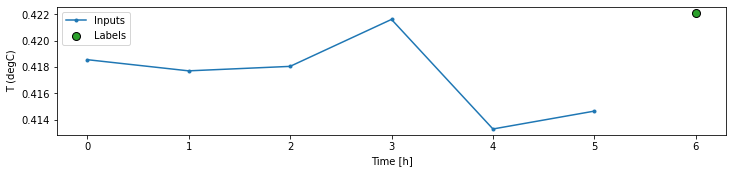

In [ ]:
w = WindowGenerator(input_width=6, label_width=1, shift=1, train_df=train_df, val_df=val_df, test_df=test_df, label_columns=['T (degC)'])
print(w)

for example_inputs, example_labels in w.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

print(w.train.element_spec)
w.plot(plot_col='T (degC)')

# Funzione compile and fit unificata per i vari modelli

In [ ]:
def compile_and_fit(model, window, patience=2, epochs=10):
  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
  
  model.summary()

  history = model.fit(window.train, 
                      epochs=epochs,
                      validation_data=window.val,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min', restore_best_weights=True)])
  return history

# Modelli singolo passo (1-passo nel futuro)

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']
Input shape: (64, 24, 19)
Output shape: (64, 24, 1)
Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (64, 24, 64)              1280      
_________________________________________________________________
dense_27 (Dense)             (64, 24, 64)              4160      
_________________________________________________________________
dense_28 (Dense)             (64, 24, 1)               65        
Total params: 5,505
Trainable params: 5,505
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5257/5257 [==============================] - 77s 15ms/step - loss: 7.1128e-04 - mea

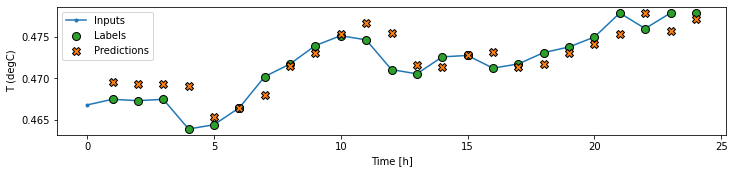

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
window = WindowGenerator(input_width=24, label_width=24, shift=1, train_df=train_df, val_df=val_df, batch=64, label_columns=['T (degC)'])

dense = tf.keras.Sequential([
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1)
                             ])

print(window)
print('Input shape:', window.example[0].shape)
print('Output shape:', dense(window.example[0]).shape)

history = compile_and_fit(dense, window)
window.plot(plot_col='T (degC)', model=dense)

Total window size: 25
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
Label column name(s): ['T (degC)']
Input shape: (64, 24, 19)
Output shape: (64, 24, 1)
Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (64, 24, 32)              6656      
_________________________________________________________________
dense_34 (Dense)             (64, 24, 1)               33        
Total params: 6,689
Trainable params: 6,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5257/5257 [==============================] - 100s 19ms/step - loss: 6.2627e-04 - mean_absolute_error: 0.0077 - val_loss: 1.7743e-05 - val_mean_absolute_error: 0.0029
Epoch 2/10
5257/5257 [===========================

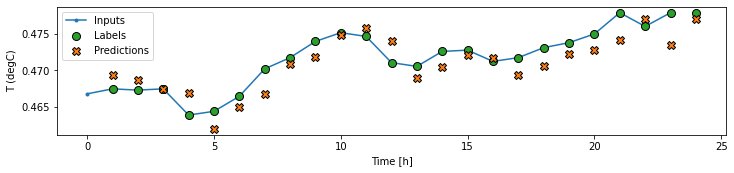

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
window = WindowGenerator(input_width=24, label_width=24, shift=1, train_df=train_df, val_df=val_df, batch=64, label_columns=['T (degC)'])

lstm_model = tf.keras.models.Sequential([
                                         # Shape [batch, time, features] => [batch, time, lstm_units]
                                         tf.keras.layers.LSTM(32, return_sequences=True),
                                         # Shape => [batch, time, features]
                                         tf.keras.layers.Dense(1)
                                         ])

print(window)
print('Input shape:', window.example[0].shape)
print('Output shape:', lstm_model(window.example[0]).shape)
history = compile_and_fit(lstm_model, window)

window.plot(plot_col='T (degC)', model=lstm_model)

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['T (degC)']
Input shape: (64, 7, 19)
Output shape: (64, 1, 1)
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (64, 133)                 0         
_________________________________________________________________
dense_29 (Dense)             (64, 64)                  8576      
_________________________________________________________________
dense_30 (Dense)             (64, 64)                  4160      
_________________________________________________________________
dense_31 (Dense)             (64, 1)                   65        
_________________________________________________________________
reshape_1 (Reshape)          (64, 1, 1)                0         
Total params: 12,801
Trainable params: 12,801
Non-trainable params: 0
_________________________

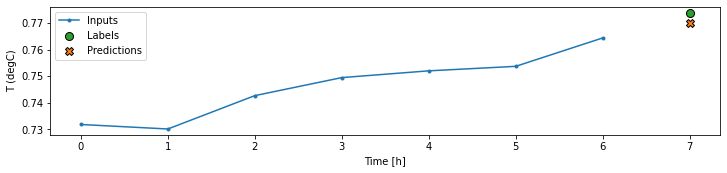

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
window = WindowGenerator(input_width=7, label_width=1, shift=1, train_df=train_df, val_df=val_df, batch=64, label_columns=['T (degC)'])

multi_step_dense = tf.keras.Sequential([
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(64, activation='relu'),
                                        tf.keras.layers.Dense(1),
                                        tf.keras.layers.Reshape([1, -1]),
                                        ])

print(window)
print('Input shape:', window.example[0].shape)
print('Output shape:', multi_step_dense(window.example[0]).shape)
history = compile_and_fit(multi_step_dense, window)

window.plot(plot_col='T (degC)', model=multi_step_dense)

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['T (degC)']
Input shape: (64, 7, 19)
Output shape: (64, 1, 1)
Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_4 (Conv1D)            (64, 1, 128)              17152     
_________________________________________________________________
dense_32 (Dense)             (64, 1, 32)               4128      
_________________________________________________________________
dense_33 (Dense)             (64, 1, 1)                33        
Total params: 21,313
Trainable params: 21,313
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5257/5257 [==============================] - 77s 15ms/step - loss: 3.2965e-04 - mean_absolute_error: 0.0073 - val_loss: 2.7578e-05 - val_mean_absolute_error: 0.0038
Epoch 2/10
5257/5257 [=========================

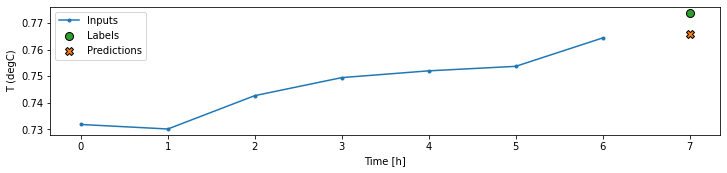

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
window = WindowGenerator(input_width=7, label_width=1, shift=1, train_df=train_df, val_df=val_df, batch=64, label_columns=['T (degC)'])

conv_model = tf.keras.Sequential([
                                  tf.keras.layers.Conv1D(128, kernel_size=7, activation='relu'),
                                  tf.keras.layers.Dense(32, activation='relu'),
                                  tf.keras.layers.Dense(1),
                                  ])

print(window)
print('Input shape:', window.example[0].shape)
print('Output shape:', conv_model(window.example[0]).shape)
history = compile_and_fit(conv_model, window)

window.plot(plot_col='T (degC)', model=conv_model)

Total window size: 8
Input indices: [0 1 2 3 4 5 6]
Label indices: [7]
Label column name(s): ['T (degC)']
Input shape: (64, 7, 19)
Output shape: (64, 1, 1)
Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (64, 32)                  6656      
_________________________________________________________________
dense_36 (Dense)             (64, 1)                   33        
_________________________________________________________________
reshape_2 (Reshape)          (64, 1, 1)                0         
Total params: 6,689
Trainable params: 6,689
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5257/5257 [==============================] - 77s 15ms/step - loss: 3.4696e-04 - mean_absolute_error: 0.0069 - val_loss: 3.1613e-05 - val_mean_absolute_error: 0.0043
Epoch 2/10
5257/5257 [===========================

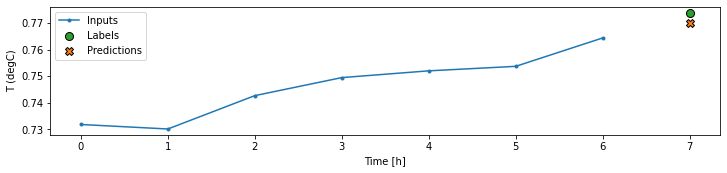

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
window = WindowGenerator(input_width=7, label_width=1, shift=1, train_df=train_df, val_df=val_df, batch=64, label_columns=['T (degC)'])

lstm_model = tf.keras.Sequential([
                                  tf.keras.layers.LSTM(32, return_sequences=False),
                                  tf.keras.layers.Dense(1),
                                  tf.keras.layers.Reshape([1, -1]),
                                  ])

print(window)
print('Input shape:', window.example[0].shape)
print('Output shape:', lstm_model(window.example[0]).shape)
history = compile_and_fit(lstm_model, window)

window.plot(plot_col='T (degC)', model=lstm_model)

# Modelli multi-step (n-passi nel futuro)

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None


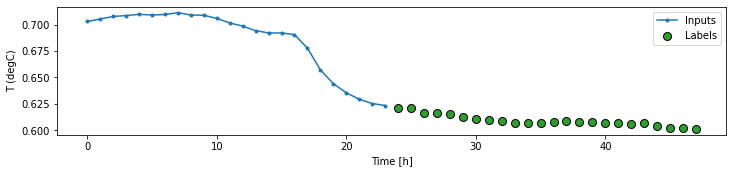

In [ ]:
np.random.seed(0)
tf.random.set_seed(0)
OUT_STEPS = 24
# non passandogli la colonna di label vengono predette tutte e 19
multi_window = WindowGenerator(input_width=24, label_width=OUT_STEPS, shift=OUT_STEPS, train_df=train_df, val_df=val_df, batch=64)

print(multi_window)
multi_window.plot(plot_col='T (degC)')

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None
Input shape: (64, 24, 19)
Output shape: (64, 24, 19)
Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (64, 1, 19)               0         
_________________________________________________________________
dense_38 (Dense)             (64, 1, 512)              10240     
_________________________________________________________________
dense_39 (Dense)             (64, 1, 456)              233928    
_________________________________________________________________
reshape_3 (Reshape)          (64, 24, 19)              0         
Total params: 244,168
Trainable params: 244,168
Non-trainable params: 0
_______________________________

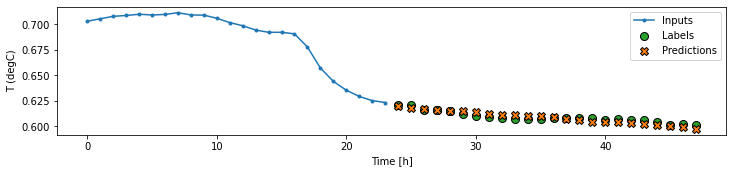

In [ ]:
tf.random.set_seed(0)
multi_dense_model = tf.keras.Sequential([
                                         # prende solo l'ultimo tempo
                                         # Shape [batch, time, features] => [batch, 1, features]
                                         tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
                                         # Shape => [batch, 1, dense_units]
                                         tf.keras.layers.Dense(512, activation='relu'),
                                         # Shape => [batch, out_steps*features]
                                         tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
                                         # Shape => [batch, out_steps, features]
                                         tf.keras.layers.Reshape([OUT_STEPS, num_features])
                                         ])

print(multi_window)
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_dense_model(multi_window.example[0]).shape)
history = compile_and_fit(multi_dense_model, multi_window)

multi_window.plot(plot_col='T (degC)', model=multi_dense_model)

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None
Input shape: (64, 24, 19)
Output shape: (64, 24, 19)
Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (64, 12, 19)              0         
_________________________________________________________________
conv1d_7 (Conv1D)            (64, 1, 256)              58624     
_________________________________________________________________
dense_42 (Dense)             (64, 1, 456)              117192    
_________________________________________________________________
reshape_6 (Reshape)          (64, 24, 19)              0         
Total params: 175,816
Trainable params: 175,816
Non-trainable params: 0
_______________________________

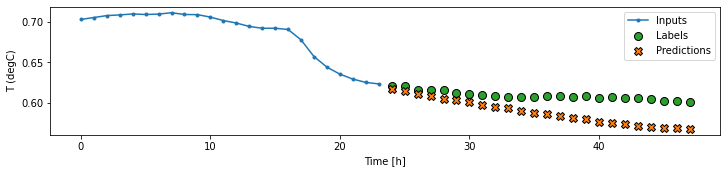

In [ ]:
tf.random.set_seed(0)
CONV_WIDTH = 12
multi_conv_model = tf.keras.Sequential([
                                        # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
                                        tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
                                        # Shape => [batch, 1, conv_units]
                                        tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
                                        # Shape => [batch, 1,  out_steps*features]
                                        tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
                                        # Shape => [batch, out_steps, features]
                                        tf.keras.layers.Reshape([OUT_STEPS, num_features])
                                        ])

print(multi_window)
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_conv_model(multi_window.example[0]).shape)
history = compile_and_fit(multi_conv_model, multi_window)

multi_window.plot(plot_col='T (degC)', model=multi_conv_model)

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None
Input shape: (64, 24, 19)
Output shape: (64, 24, 19)
Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (64, 32)                  6656      
_________________________________________________________________
dense_43 (Dense)             (64, 456)                 15048     
_________________________________________________________________
reshape_7 (Reshape)          (64, 24, 19)              0         
Total params: 21,704
Trainable params: 21,704
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
5257/5257 [==============================] - 93s 18ms/step - loss: 0.0041 - mean_absolut

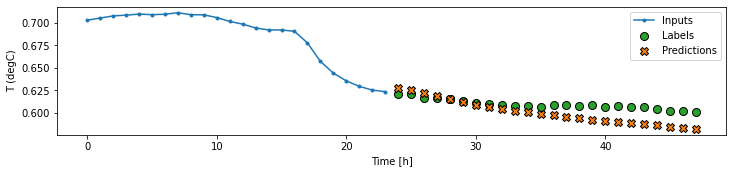

In [ ]:
tf.random.set_seed(0)
multi_lstm_model = tf.keras.Sequential([
                                        # Shape [batch, time, features] => [batch, lstm_units]
                                        tf.keras.layers.LSTM(32, return_sequences=False),
                                        # Shape => [batch, out_steps*features]
                                        tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
                                        # Shape => [batch, out_steps, features]
                                        tf.keras.layers.Reshape([OUT_STEPS, num_features])
                                        ])

print(multi_window)
print('Input shape:', multi_window.example[0].shape)
print('Output shape:', multi_lstm_model(multi_window.example[0]).shape)
history = compile_and_fit(multi_lstm_model, multi_window)

multi_window.plot(plot_col='T (degC)', model=multi_lstm_model)

## Encoder-Decoder

**Tutorial**: https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/

La rappresentazione interna della sequenza di input (in output dal layer LSTM encoder) viene ripetuta più volte, una per ogni fase temporale della sequenza di output. Questa sequenza di vettori verrà presentata al decodificatore LSTM. Il decoder ritrorna l'intera sequenza, non solo l'uscita alla fine della sequenza come abbiamo fatto con l'encoder. Ciò significa che ciascuna delle unità produrrà un valore per ciascuna features.



Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 24, 19)]          0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               282624    
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 24, 256)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 24, 256)           525312    
_________________________________________________________________
dense_4 (Dense)              (None, 24, 128)           32896     
_________________________________________________________________
dense_5 (Dense)              (None, 24, 19)            2451      
Total params: 843,283
Trainable params: 843,283
Non-trainable params: 0
________________________________________________

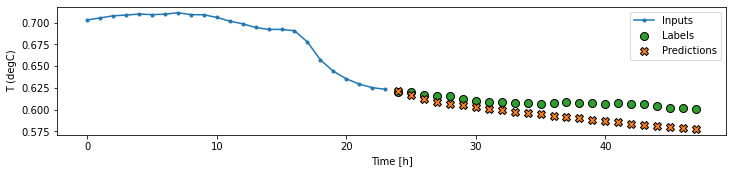

In [ ]:
tf.random.set_seed(0)
rnn_units = 256
time = 24
feature_in = num_features
feature_out = num_features

input = tf.keras.layers.Input((time, feature_in))
lstm_out = tf.keras.layers.LSTM(rnn_units, return_sequences=False) (input)
rep_vect = tf.keras.layers.RepeatVector(time) (lstm_out)
lstm_out = tf.keras.layers.LSTM(rnn_units, return_sequences=True) (rep_vect)
dense = tf.keras.layers.Dense(128, activation='relu') (lstm_out)
prediction = tf.keras.layers.Dense(feature_out) (dense)

enc_dec = tf.keras.models.Model(input, prediction)
history = compile_and_fit(enc_dec, multi_window)

multi_window.plot(plot_col='T (degC)', model=enc_dec)

## Autoregressive LSTM model

**Tutorial**: https://www.tensorflow.org/tutorials/structured_data/time_series#advanced_autoregressive_model

Il modello che viene esplicitamente addestrato ad eseguire un ciclo di autoregressione. Volendo è possibile eseguire un ciclo di feedback autoregressivo sui modelli visti prima.

![](https://www.tensorflow.org/tutorials/structured_data/images/multistep_autoregressive.png)

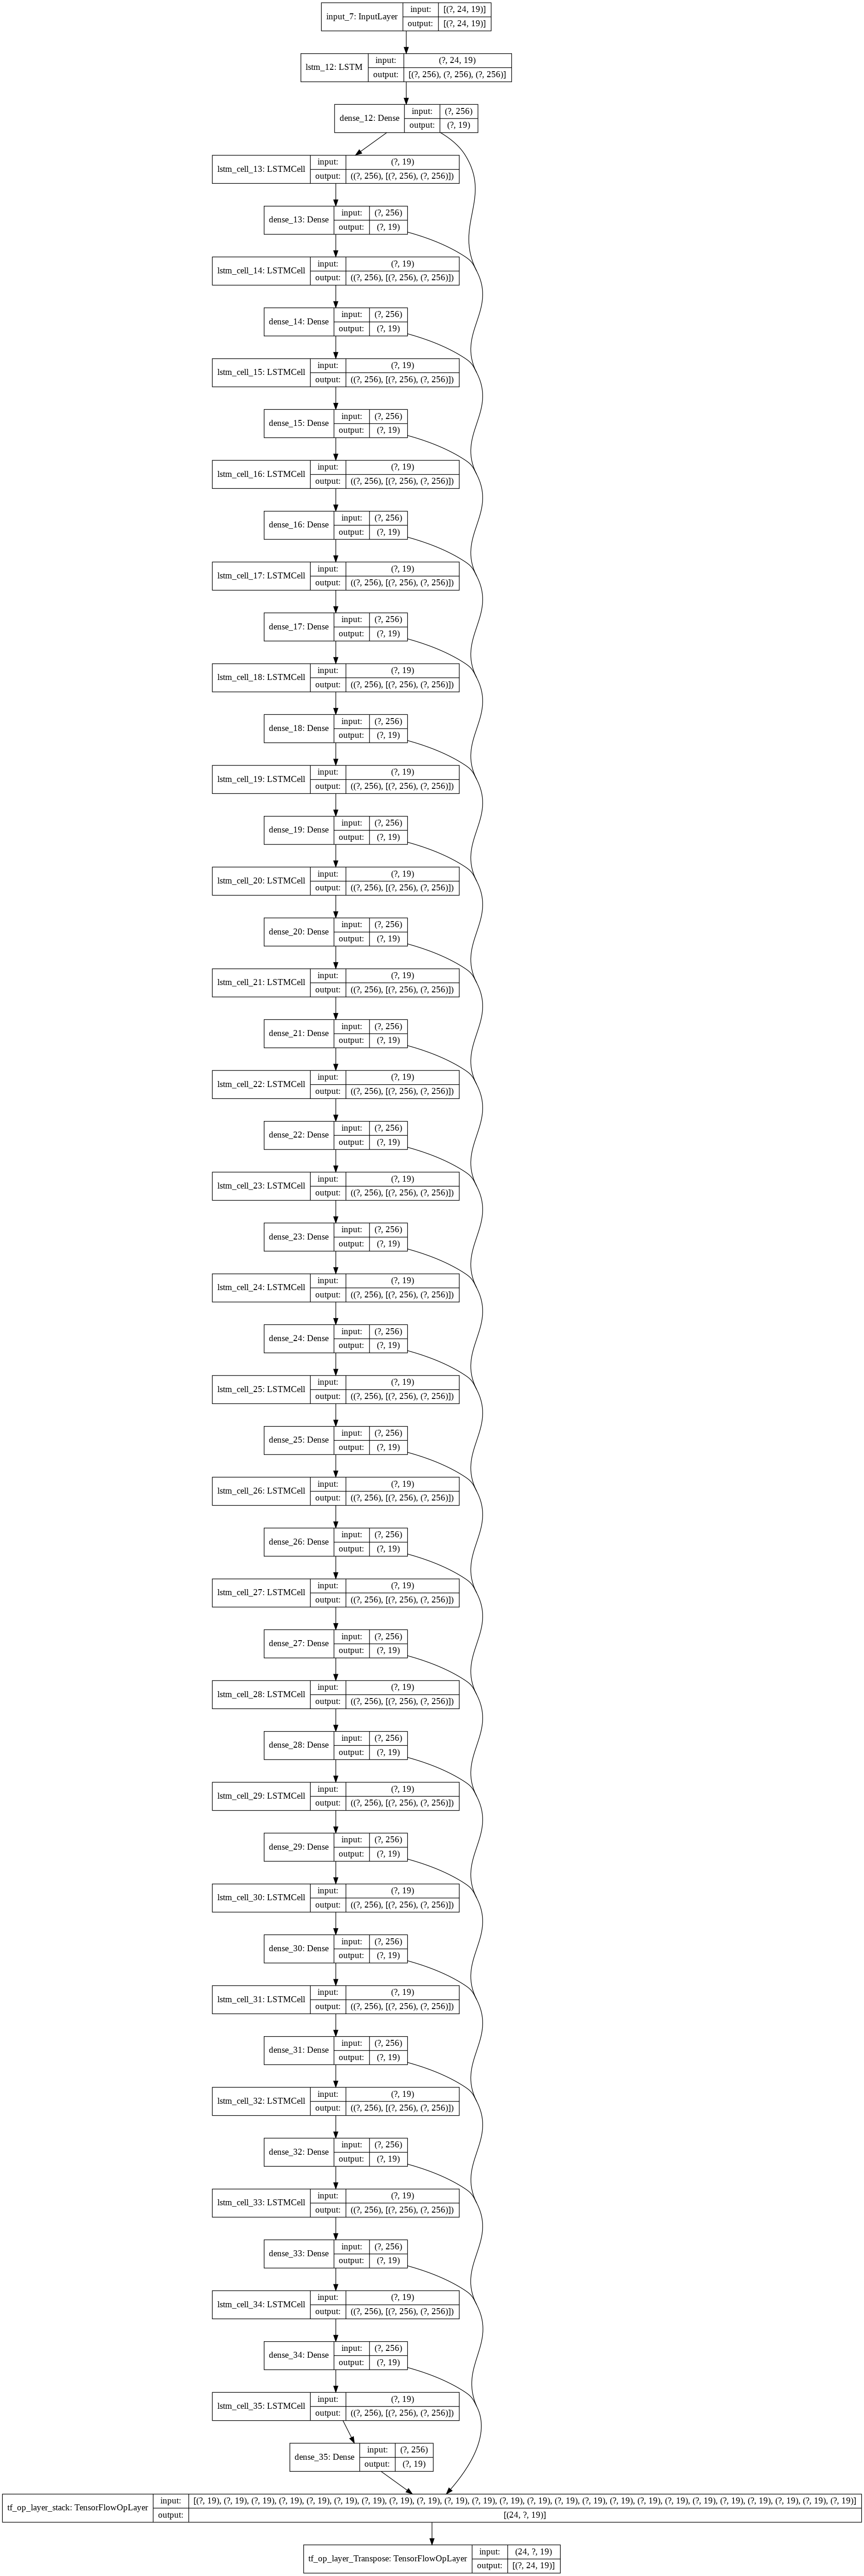

In [ ]:
tf.random.set_seed(0)
rnn_units = 256
time = 24
feature_in = num_features
feature_out = num_features

input = tf.keras.layers.Input((time, feature_in))
lstm_out, state_h, state_c = tf.keras.layers.LSTM(rnn_units, return_state=True) (input)
state = [state_h, state_c]
prediction = tf.keras.layers.Dense(feature_out) (lstm_out)

predictions = []
predictions.append(prediction)

for n in range(1, OUT_STEPS):
    # uso l'ultima predizione come input
    x = prediction
    # LSTMCell è un'istanza di LSTM dove fa un singolo passo e prende in input una singola feature 2D
    x, state =  tf.keras.layers.LSTMCell(rnn_units) (x, states=state, training=None)
    prediction = tf.keras.layers.Dense(feature_out) (x)
    predictions.append(prediction)

predictions = tf.stack(predictions)
predictions = tf.transpose(predictions, [1, 0, 2])

multi_lstm_model = tf.keras.models.Model(input, predictions)

multi_lstm_model.compile(loss=tf.keras.losses.MeanSquaredError(),
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=[tf.keras.metrics.MeanAbsoluteError()])

prediction = multi_lstm_model(multi_window.example[0])

tf.keras.utils.plot_model(multi_lstm_model, show_shapes=True)

Epoch 1/10
5257/5257 [==============================] - 98s 19ms/step - loss: 0.0023 - mean_absolute_error: 0.0266 - val_loss: 0.0012 - val_mean_absolute_error: 0.0216
Epoch 2/10
5257/5257 [==============================] - 98s 19ms/step - loss: 0.0011 - mean_absolute_error: 0.0201 - val_loss: 0.0012 - val_mean_absolute_error: 0.0208
Epoch 3/10
5257/5257 [==============================] - 98s 19ms/step - loss: 0.0010 - mean_absolute_error: 0.0190 - val_loss: 0.0012 - val_mean_absolute_error: 0.0209
Epoch 4/10
5257/5257 [==============================] - 98s 19ms/step - loss: 9.9965e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0011 - val_mean_absolute_error: 0.0195
Epoch 5/10
5257/5257 [==============================] - 101s 19ms/step - loss: 9.7317e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0011 - val_mean_absolute_error: 0.0188
Epoch 6/10
5257/5257 [==============================] - 97s 18ms/step - loss: 9.5241e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0011 - val_mean_ab

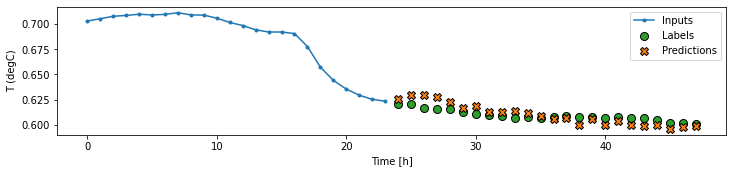

In [ ]:
history = multi_lstm_model.fit(multi_window.train,
                               epochs=10,
                               validation_data=multi_window.val,
                               callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)])

multi_window.plot(plot_col='T (degC)', model=multi_lstm_model)

# ESEMPIO con le Stock Quotes di AMD

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [5]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/DeepLearningExamples/AMD.csv")
data = data.drop(columns=['Date'])
data

Open       High        Low      Close    Volume
0       0.000000   3.302083   3.125000   3.145833    219600
1       0.000000   3.125000   2.937500   3.031250    727200
2       0.000000   3.083333   3.020833   3.041667    295200
3       0.000000   3.062500   3.010417   3.010417    159600
4       0.000000   3.020833   2.906250   2.916667    130800
...          ...        ...        ...        ...       ...
10187  85.050003  85.160004  79.320000  82.239998  70536100
10188  80.709999  80.709999  76.099998  76.879997  77877700
10189  78.430000  82.879997  77.550003  82.610001  88607800
10190  82.879997  84.019997  81.540001  81.839996  57407400
10191  81.809998  83.239998  80.879997  81.300003  42360400

[10192 rows x 5 columns]

In [6]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.9)]
val_df = data[int(n*0.9):]

num_features = data.shape[1]
num_features, train_df.shape, val_df.shape

(5, (9172, 5), (1020, 5))

In [7]:
scaler = MinMaxScaler()
# scaler = StandardScaler()
train_df = pd.DataFrame(scaler.fit_transform(train_df), columns = train_df.columns)
val_df = pd.DataFrame(scaler.transform(val_df), columns = val_df.columns)
train_df.head(10)

Open      High       Low     Close    Volume
0   0.0  0.034439  0.034518  0.033257  0.001346
1   0.0  0.030656  0.030246  0.030760  0.004459
2   0.0  0.029766  0.032145  0.030987  0.001810
3   0.0  0.029321  0.031907  0.030306  0.000979
4   0.0  0.028431  0.029534  0.028262  0.000802
5   0.0  0.026205  0.023363  0.022813  0.002678
6   0.0  0.022645  0.021465  0.021451  0.003958
7   0.0  0.019529  0.018617  0.018045  0.002862
8   0.0  0.014634  0.014345  0.016456  0.006923
9   0.0  0.019084  0.019329  0.020089  0.004083

Total window size: 14
Input indices: [0 1 2 3 4 5 6]
Label indices: [ 7  8  9 10 11 12 13]
Label column name(s): ['Close']


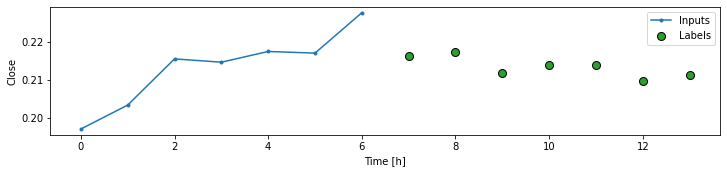

In [17]:
np.random.seed(4)
OUT_STEPS = 7
num_features = 1
multi_window = WindowGenerator(input_width=7, label_width=OUT_STEPS, shift=OUT_STEPS, train_df=train_df, val_df=val_df, batch=16, label_columns=['Close'])

print(multi_window)
multi_window.plot(plot_col='Close')

Input shape: (16, 7, 5)
Output shape: (16, 7, 1)
Epoch 1/10
573/573 [==============================] - 3s 5ms/step - loss: 0.0027 - mean_absolute_error: 0.0261 - val_loss: 0.0093 - val_mean_absolute_error: 0.0543
Epoch 2/10
573/573 [==============================] - 3s 5ms/step - loss: 6.7766e-04 - mean_absolute_error: 0.0166 - val_loss: 0.0058 - val_mean_absolute_error: 0.0413
Epoch 3/10
573/573 [==============================] - 3s 5ms/step - loss: 6.3607e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0045 - val_mean_absolute_error: 0.0367
Epoch 4/10
573/573 [==============================] - 3s 5ms/step - loss: 5.9629e-04 - mean_absolute_error: 0.0151 - val_loss: 0.0036 - val_mean_absolute_error: 0.0331
Epoch 5/10
573/573 [==============================] - 2s 4ms/step - loss: 5.6010e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0037 - val_mean_absolute_error: 0.0346
Epoch 6/10
573/573 [==============================] - 2s 4ms/step - loss: 5.4128e-04 - mean_absolute_error: 0.0142 

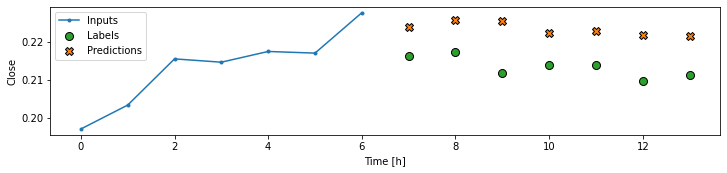

In [18]:
tf.random.set_seed(0)
model = tf.keras.Sequential([
                             tf.keras.layers.LSTM(32, return_sequences=False),
                             tf.keras.layers.Dense(OUT_STEPS*num_features, kernel_initializer=tf.initializers.zeros),
                             tf.keras.layers.Reshape([OUT_STEPS, num_features])
                             ])

print('Input shape:', multi_window.example[0].shape)
print('Output shape:', model(multi_window.example[0]).shape)

model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = model.fit(multi_window.train, 
                    epochs=10,
                    validation_data=multi_window.val,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)]
                    )

model.summary()

multi_window.plot(plot_col='Close', model=model)

Input shape: (16, 7, 5)
Output shape: (16, 7, 1)
Epoch 1/10
573/573 [==============================] - 4s 7ms/step - loss: 9.9195e-04 - mean_absolute_error: 0.0191 - val_loss: 0.0039 - val_mean_absolute_error: 0.0341
Epoch 2/10
573/573 [==============================] - 4s 6ms/step - loss: 6.2353e-04 - mean_absolute_error: 0.0158 - val_loss: 0.0041 - val_mean_absolute_error: 0.0349
Epoch 3/10
573/573 [==============================] - 4s 6ms/step - loss: 6.0268e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0029 - val_mean_absolute_error: 0.0304
Epoch 4/10
573/573 [==============================] - 4s 7ms/step - loss: 5.7215e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0052 - val_mean_absolute_error: 0.0397
Epoch 5/10
573/573 [==============================] - 4s 6ms/step - loss: 5.7266e-04 - mean_absolute_error: 0.0149 - val_loss: 0.0041 - val_mean_absolute_error: 0.0349


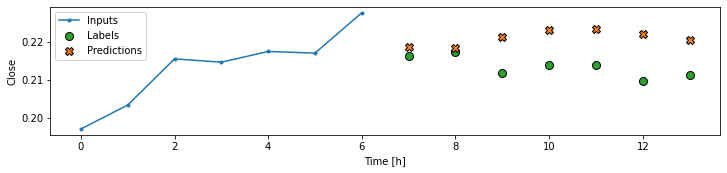

In [19]:
tf.random.set_seed(0)
rnn_units = 128
time = 7
feature_in = 5
feature_out = 1

# modifica con condivisione di stati
input = tf.keras.layers.Input((time, feature_in))
lstm_out, state_h, state_c = tf.keras.layers.LSTM(rnn_units, return_sequences=False, return_state=True) (input)
rep_vect = tf.keras.layers.RepeatVector(time) (lstm_out)
lstm_out = tf.keras.layers.LSTM(rnn_units, return_sequences=True) (rep_vect, initial_state=[state_h, state_c])
dense = tf.keras.layers.Dense(64, activation='relu') (lstm_out)
prediction = tf.keras.layers.Dense(feature_out) (dense)

enc_dec = tf.keras.models.Model(input, prediction)

print('Input shape:', multi_window.example[0].shape)
print('Output shape:', enc_dec(multi_window.example[0]).shape)

enc_dec.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = enc_dec.fit(multi_window.train,
                      epochs=10,
                      validation_data=multi_window.val,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)]
                      )

multi_window.plot(plot_col='Close', model=enc_dec)

Epoch 1/10
573/573 [==============================] - 5s 8ms/step - loss: 0.0018 - mean_absolute_error: 0.0223 - val_loss: 0.0067 - val_mean_absolute_error: 0.0435
Epoch 2/10
573/573 [==============================] - 4s 7ms/step - loss: 6.5982e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0055 - val_mean_absolute_error: 0.0391
Epoch 3/10
573/573 [==============================] - 4s 7ms/step - loss: 6.2401e-04 - mean_absolute_error: 0.0155 - val_loss: 0.0049 - val_mean_absolute_error: 0.0371
Epoch 4/10
573/573 [==============================] - 4s 7ms/step - loss: 5.7471e-04 - mean_absolute_error: 0.0148 - val_loss: 0.0048 - val_mean_absolute_error: 0.0373
Epoch 5/10
573/573 [==============================] - 4s 7ms/step - loss: 5.5332e-04 - mean_absolute_error: 0.0145 - val_loss: 0.0061 - val_mean_absolute_error: 0.0425
Epoch 6/10
573/573 [==============================] - 4s 7ms/step - loss: 5.2991e-04 - mean_absolute_error: 0.0139 - val_loss: 0.0052 - val_mean_absolute_error: 0.0

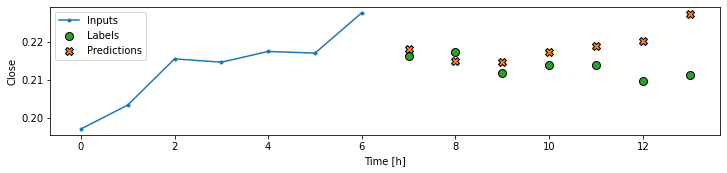

In [24]:
rnn_units = 64
time = 7
feature_in = 5
feature_out = 1

tf.random.set_seed(0)
input = tf.keras.layers.Input((time, feature_in))
lstm_out, state_h, state_c = tf.keras.layers.LSTM(rnn_units, return_state=True) (input)
state = [state_h, state_c]
prediction = tf.keras.layers.Dense(feature_out) (lstm_out)

predictions = []
predictions.append(prediction)

for n in range(1, OUT_STEPS):
    x = prediction
    x, state =  tf.keras.layers.LSTMCell(rnn_units) (x, states=state, training=None)
    prediction = tf.keras.layers.Dense(feature_out) (x)
    predictions.append(prediction)

predictions = tf.stack(predictions)
predictions = tf.transpose(predictions, [1, 0, 2])

multi_lstm_model = tf.keras.models.Model(input, predictions)

multi_lstm_model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.MeanAbsoluteError()])

history = multi_lstm_model.fit(multi_window.train, 
                    epochs=10,
                    validation_data=multi_window.val,
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min', restore_best_weights=True)]
                    )

multi_window.plot(plot_col='Close', model=multi_lstm_model)